In [1]:
import my_star_functions as sf
from my_astro_constants import *
import matplotlib.pyplot as plt
import numpy as np
import my_numerical_methods as nm

In [2]:
#pt 1 -> test for numerical methods integrators
# Domain
a = 0
b = np.pi/2
num_step = np.logspace(2, 6, num=5, dtype=int)
len_step = len(num_step)


# Dictionary for Integrators, makes it easier to call them
#integrator = nm.
rules = [nm.Integrators.RECTANGLE_RULE, nm.Integrators.TRAPEZOIDAL_RULE, nm.Integrators.SIMPSON_RULE]
n_rules = len(rules)

# Function
f = lambda x: np.sin(x)

# Arrays to hold results + errors for each of the methods
res = np.zeros((n_rules, len_step))
err = np.zeros((n_rules, len_step))

for i, method in enumerate(rules):
    for j, n in enumerate(num_step):
        integ = nm.Integrators(a, b, n)
        res[i, j] = integ.integrate(method, f)
        err[i, j] = abs(2 - res[i, j])  # Assuming the exact integral of sin(x) from 0 to pi is 2

    print(f"Method {method}:", res[i])
    


Method 1 Rectangle: [0.99212546 0.9992144  0.99992146 0.99999215 0.99999921]
Method 2 Trapezoidal: [0.99997944 0.99999979 1.         1.         1.        ]
Method 3 Simpson: [1. 1. 1. 1. 1.]


Errors of Numerical Methods
Method 1 Rectangle  [7.87454339e-03 7.85603780e-04 7.85418725e-05 7.85400220e-06
 7.85398504e-07]
Method 2 Trapezoidal  [2.05617604e-05 2.05616768e-07 2.05616535e-09 2.05667705e-11
 3.41060513e-13]
Method 3 Simpson  [3.38236106e-10 3.24185123e-14 5.55111512e-16 2.28705943e-14
 8.92619312e-14]
No figname provided, figure saved as "test_plot.png"
No figname provided, figure saved as "test_plot.png"
No figname provided, figure saved as "test_plot.png"


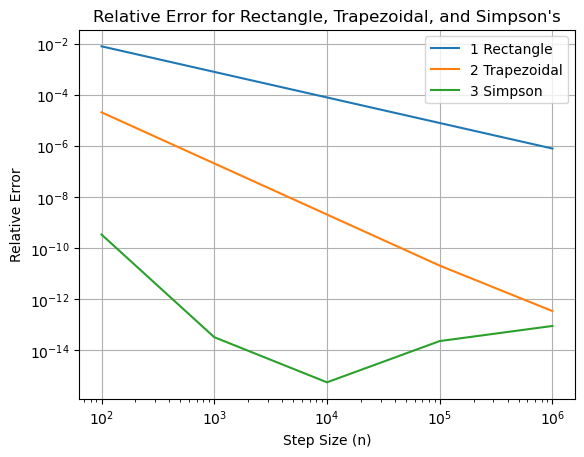

In [3]:

f_integ = lambda x: -np.cos(x)
i_real = np.zeros(len_step)

for j in range(len_step):
    ireal_in = np.linspace(a, b, num_step[j])
    for i in range(1, len(ireal_in)):
        i_real[j] +=  f_integ(ireal_in[i]) - f_integ(ireal_in[i-1])


for i, method in enumerate(rules):
    for j, intervals in enumerate(num_step):
        err[i,j] = nm.rel_err(i_real[j], res[i,j])

print(f"Errors of Numerical Methods")
for i, method in enumerate(rules):
    print(f"Method {method} ", err[i])


t = "Relative Error for Rectangle, Trapezoidal, and Simpson's"


# Plot each method's error using your plot_func
for i, method in enumerate(rules):
    sf.plot_func(
        x=num_step,
        y=err[i],
        xlabel="Step Size (n)",
        ylabel="Relative Error",
        flag_y=1,
        flag_x=1,
        label=rules[i],
        Title=t,
        save_fig=True
    )

Above shows the relative error to each of the numerical methods for integration. as we can see that the rectangle takes the longest, then trapezoidal, and after simpson.

In [4]:
#input parameters domain + function

# Domain
a = 0
b = np.pi/2
num_step = np.logspace(2, 6, num=5, dtype=int)
len_step = len(num_step)


# Dictionary for Integrators, makes it easier to call them
rules = [nm.Integrators.RECTANGLE_RULE, nm.Integrators.TRAPEZOIDAL_RULE, nm.Integrators.SIMPSON_RULE]
n_rules = len(rules)

# Function
f = lambda x: np.sin(x)

# Arrays to hold results + errors for each of the methods
res = np.zeros((n_rules, len_step))
err = np.zeros((n_rules, len_step))

for i, method in enumerate(rules):
    for j, n in enumerate(num_step):
        integ = nm.Integrators(a, b, n)
        res[i, j] = integ.integrate(method, f)
        err[i, j] = abs(2 - res[i, j])  # Assuming the exact integral of sin(x) from 0 to pi is 2

    print(f"Method {method}:", res[i])
    


Method 1 Rectangle: [0.99212546 0.9992144  0.99992146 0.99999215 0.99999921]
Method 2 Trapezoidal: [0.99997944 0.99999979 1.         1.         1.        ]
Method 3 Simpson: [1. 1. 1. 1. 1.]


In [5]:


# Parameters
lam_min = 1e-6  # Initial upper limit for integration
lam_max = 9e-6 
n = 1000
tol = 1e-6  # Tolerance for convergence
T = 5800  # Effective temperature of the blackbody (e.g., Sun)\
# Theoretical value from Stefan-Boltzmann law
theory_pwr = (sigma * T**4) / np.pi
err_lam = np.zeros((n_rules, len_step))

def B_lambda(lam, T):
    """
    Calculate the spectral radiance of a blackbody using Planck's law.

    Parameters:
        lam (float or np.ndarray): Wavelength(s) in meters.
        T (float): Temperature in Kelvin.

    Returns:
        float or np.ndarray: Spectral radiance in W/m^2/sr/m.
    """
    if np.any(lam == 0):
        raise ValueError("Wavelength cannot be zero (division by zero).")

    x = h * c / (lam * k * T)  # Exponent in Planck's law

    # Avoid overflow by rewriting 1 / (exp(x) - 1) as exp(-x) / (1 - exp(-x))
    exp_x = np.exp(-x)
    denominator = 1 - exp_x  # 1 - exp(-x)

    # Handle cases where x is very large (denominator approaches 1)
    denominator = np.where(x > 100, 1.0, denominator)

    B_lambda = (2 * h * c**2) / (lam**5) * (exp_x / denominator)
    return B_lambda


# Adaptive integration loop
try:

    # Perform integration for each method
    for i, method in enumerate(rules):
        for j, n in enumerate(num_step):
            try:
                # Compute the integral
                integrator = nm.Integrators(lam_min, lam_max, n)  # Initialize integrator
                total_pwr = integrator.integrate(method, lambda x: B_lambda(x, T))
                # Calculate relative error
                err_lam[i,j] = nm.rel_err(theory_pwr, total_pwr)
    
        
            except ValueError as e:
                print(f"Error with method {method}: {e}")
                
    # Print results
    for i, method in enumerate(rules):
        print(f"Method: {method}")
        print(f"Total power per unit area: {total_pwr} W/m^2")
        print(f"Theoretical radiated power per area (Stefan-Boltzmann): {theory_pwr} W/m^2")
        print(f"Relative error: {err_lam[i]}")
        print("-" * 50)
    
except ValueError as e:
    print(f"Error: {e}")


Method: 1 Rectangle
Total power per unit area: 128.02335806680946 W/m^2
Theoretical radiated power per area (Stefan-Boltzmann): 20532269556.42814 W/m^2
Relative error: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999]
--------------------------------------------------
Method: 2 Trapezoidal
Total power per unit area: 128.02335806680946 W/m^2
Theoretical radiated power per area (Stefan-Boltzmann): 20532269556.42814 W/m^2
Relative error: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999]
--------------------------------------------------
Method: 3 Simpson
Total power per unit area: 128.02335806680946 W/m^2
Theoretical radiated power per area (Stefan-Boltzmann): 20532269556.42814 W/m^2
Relative error: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999]
--------------------------------------------------


No figname provided, figure saved as "test_plot.png"
No figname provided, figure saved as "test_plot.png"
No figname provided, figure saved as "test_plot.png"


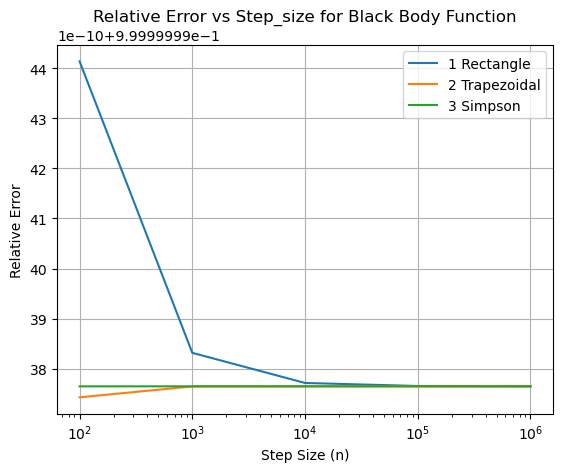

In [6]:
# Plot each method's error using your plot_func
t_lam = "Relative Error vs Step_size for Black Body Function"
for i, method in enumerate(rules):
    sf.plot_func(
        x=num_step,
        y=err_lam[i],
        xlabel="Step Size (n)",
        ylabel="Relative Error",
        flag_y=0,
        flag_x=1,
        label=rules[i],
        Title=t_lam,
        save_fig=True
    )

### Compare your numerical results: Following the same procedure stated in Problem 1, compure your numerical results with the exact solution by plotting your fractional (relative) errors as a function of (number of steps), and for each method and answer the following.

### How does the accuracy of your numerical results depend on and ? Comment (again) on the {order} of each method.

What we can see is that the relative error is greater with rectangle versus simpson. This is proven correct by what we know for the numerical methods rules. After the rectangle we see that the trapezoidal might be more accurate by the simpson but it may be due to the step size requested.

### Part 2

In [7]:

#EXAMPLE: Testing Root Functions
# Generalized linear function
def linear_func(x, m, b):
    """
    Generalized linear function: y = m * x + b

    Parameters:
        x (array-like): Input array of x-values.
        m (float): Slope of the linear function.
        b (float): Y-intercept of the linear function.

    Returns:
        y (array-like): Output array of y-values.
    """
    return m * x + b

# Parameters
m = 2  # Slope
b = 1  # Y-intercept
f = lambda x: linear_func(x, m, b) #plots as 2x+1
start = -10  # Lower bound
end = 0     # Upper bound

# Tolerance values
tol = np.logspace(start = -10, stop = -4, num = 4 )
n_tol = len(tol)

# Root-finding methods
rootfinder = [nm.RootFinders.BISECTION, nm.RootFinders.NEWTON, nm.RootFinders.SECANT]
n_rf = len(rootfinder)
res = np.zeros((n_rf, n_tol))
iter_res = np.zeros((n_rf, n_tol))
tol_record = np.zeros((n_rf, n_tol))

# Exact root of the linear function
root_exact = -b / m
print(f"Exact root: {root_exact}. Used to make a comparison based on the Root Finder Equations.")

# Test root-finding methods
for i, method in enumerate(rootfinder):
    for j, toler in enumerate(tol):
        root = nm.RootFinders(f, start, end, toler)
        res[i,j], iter_res[i,j] = root.find(method)
        tol_record[i,j] = toler
        print(f"Method: {method}. Tolerance: {toler} -> Root: {res[i, j]} w/ Iterations: {iter_res[i,j]}")


Exact root: -0.5. Used to make a comparison based on the Root Finder Equations.
Method: 1 Bisection. Tolerance: 1e-10 -> Root: -0.5000000000291038 w/ Iterations: 36.0
Method: 1 Bisection. Tolerance: 1e-08 -> Root: -0.4999999888241291 w/ Iterations: 29.0
Method: 1 Bisection. Tolerance: 1e-06 -> Root: -0.5000007152557373 w/ Iterations: 23.0
Method: 1 Bisection. Tolerance: 0.0001 -> Root: -0.500030517578125 w/ Iterations: 16.0
Method: 2 Newton. Tolerance: 1e-10 -> Root: -0.5 w/ Iterations: 2.0
Method: 2 Newton. Tolerance: 1e-08 -> Root: -0.4999999996403499 w/ Iterations: 1.0
Method: 2 Newton. Tolerance: 1e-06 -> Root: -0.4999999996403499 w/ Iterations: 1.0
Method: 2 Newton. Tolerance: 0.0001 -> Root: -0.4999999996403499 w/ Iterations: 1.0
Method: 3 Secant. Tolerance: 1e-10 -> Root: -0.5 w/ Iterations: 1.0
Method: 3 Secant. Tolerance: 1e-08 -> Root: -0.5 w/ Iterations: 1.0
Method: 3 Secant. Tolerance: 1e-06 -> Root: -0.5 w/ Iterations: 1.0
Method: 3 Secant. Tolerance: 0.0001 -> Root: -0.5 

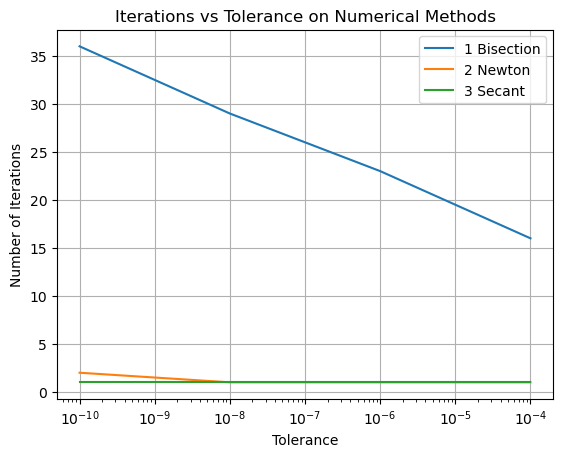

In [8]:
#plot
title = "Iterations vs Tolerance on Numerical Methods"

# Plot each method's error using your plot_func
for i in range(n_rf):
    sf.plot_func(
                    x= tol_record[i],
                    y= iter_res[i],
                    xlabel="Tolerance",
                    ylabel="Number of Iterations",
                    flag_y=0,
                    flag_x=1,
                    label=rootfinder[i],
                    Title= title,
                    save_fig=False
                )

(b) Plot and describe how these different root-finding methods 
compare in speed and accuracy (e.g., consider what we learned about each method in class; 
comment on how fast a given method converges based on your chosen tolerance 
-- also feel free to experiment with other tolerances.)

### Response

We can see that the secant method is the most effective, however, I did run into some problems with the iterations, because depending on how big the range is to determine the root, this can impact how long the newton method can run. Also I was having trouble with the derivative for the newton's method because at a certain point to compare to the tolerance the derivative goes to zero for the denomiator and can't calculate...

Habitable Zone: Using method: 1 Bisection. Tolerance: 1e-10 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 1 Bisection. Tolerance: 1e-08 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 1 Bisection. Tolerance: 1e-06 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 1 Bisection. Tolerance: 0.0001 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 2 Newton. Tolerance: 1e-10 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 2 Newton. Tolerance: 1e-08 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.
Habitable Zone: Using method: 2 Newton. Tolerance: 1e-06 -> Error: Denominator is non-positive for T_eff = 2000. Cannot compute square root.


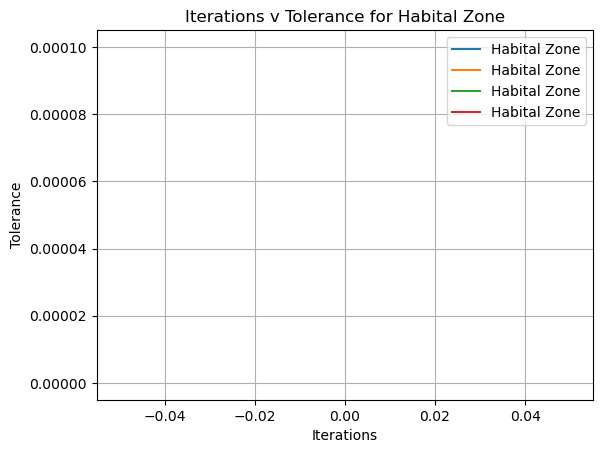

In [9]:
#pt a
s_eff = 1.014 #
T_min = 2000
T_max = 6000
a_min = 8.177E-4
b_max = 1.706E-9
res_bb = np.zeros((n_rf, n_tol))
tol_recordbb = np.zeros((n_rf, n_tol))
iter_resbb = np.zeros((n_rf, n_tol))


# Define the function for habitable zone root-finding
def f_Teff(T_eff, a, b):
    """
    Function to compute the difference between the calculated distance and the target distance (0.5 AU).


    Parameters:
        T_eff (float): The effective temperature of the star (in Kelvin).
        a (float): Coefficient for the linear term in the denominator.
        b (float): Coefficient for the quadratic term in the denominator.

    Returns:
        float: The difference between the calculated distance and the target distance (0.5 AU).

    Raises:
        ValueError: If the denominator is non-positive, indicating that the square root cannot be computed.
    """
    T_star = T_eff - 5780
    denominator = s_eff + a * T_star + b * T_star**2
    
    # Check if the denominator is positive
    if denominator <= 0:
        raise ValueError(f"Denominator is non-positive for T_eff = {T_eff}. Cannot compute square root.")
    
    d = np.sqrt(((T_eff / 5780)**4) / denominator)
    return d - 0.5

# Define the derivative for habitable zone root-finding
def f_Teff_derivative(T_eff, a, b):
    """
    Function to compute the derivative of `f(T_eff)` with respect to `T_eff`.


    Parameters:
        T_eff (float): The effective temperature of the star (in Kelvin).
        a (float): Coefficient for the linear term in the denominator.
        b (float): Coefficient for the quadratic term in the denominator.

    Returns:
        float: The derivative of `f(T_eff)` with respect to `T_eff`.

    Raises:
        ValueError: If the denominator is non-positive, indicating that the derivative cannot be computed.
    """
    T_star = T_eff - 5780
    denominator = s_eff + a * T_star + b * T_star**2
    if denominator <= 0:
        raise ValueError(f"Denominator is non-positive for T_eff = {T_eff}. Cannot compute derivative.")
    
    # Compute the derivative using the quotient rule
    numerator = (T_eff / 5780)**4
    d_numerator = 4 * (T_eff / 5780)**3 / 5780
    d_denominator = a + 2 * b * T_star
    der = (d_numerator * denominator - numerator * d_denominator) / (2 * np.sqrt(numerator / denominator)) * denominator**2
    
    return der



# Root-finding loop for habitable zone
for i, method in enumerate(rootfinder):
    for j, toler in enumerate(tol):
        # Use a lambda function to fix the values of a and b
        f_Teff_fixed = lambda T_eff: f_Teff(T_eff, a_min, b_max)
        root_hz = nm.RootFinders(f_Teff_fixed, T_min, T_max, toler)
        #root_hz.derivative = lambda T_eff: f_Teff_derivative(T_eff, a_min, b_max)  # Set the derivative function
        try:
            res_bb[i, j], iter_resbb[i, j] = root_hz.find(method)
            print(f"Habitable Zone: Using method: {method}. Tolerance: {toler} -> Root: {res_bb[i, j]}")
        except ValueError as e:
            print(f"Habitable Zone: Using method: {method}. Tolerance: {toler} -> Error: {e}")

sf.plot_func(iter_resbb, tol_record, xlabel = "Iterations", ylabel = "Tolerance", label = "Habital Zone", Title = "Iterations v Tolerance for Habital Zone", save_fig = True)

Wein's Law: Using method: 1 Bisection. Tolerance: 1e-10 -> Root: 4.9651142318034545
Wein's Law: Using method: 1 Bisection. Tolerance: 1e-08 -> Root: 4.9651142209768295
Wein's Law: Using method: 1 Bisection. Tolerance: 1e-06 -> Root: 4.965112686157227
Wein's Law: Using method: 1 Bisection. Tolerance: 0.0001 -> Root: 4.9652099609375
Overflow encountered in Newton's method. Falling back to bisection method.
Wein's Law: Using method: 2 Newton. Tolerance: 1e-10 -> Root: 4.9651142318034545
Overflow encountered in Newton's method. Falling back to bisection method.
Wein's Law: Using method: 2 Newton. Tolerance: 1e-08 -> Root: 4.9651142209768295
Overflow encountered in Newton's method. Falling back to bisection method.
Wein's Law: Using method: 2 Newton. Tolerance: 1e-06 -> Root: 4.965112686157227
Overflow encountered in Newton's method. Falling back to bisection method.
Wein's Law: Using method: 2 Newton. Tolerance: 0.0001 -> Root: 4.9652099609375
Wein's Law: Using method: 3 Secant. Tolerance:

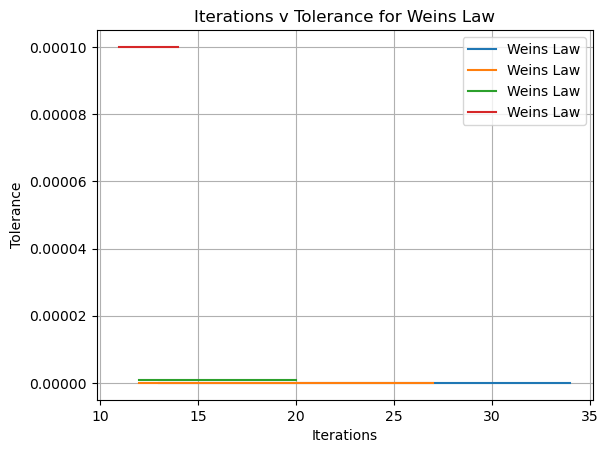

In [10]:
#pt 2 - find "b"
lam = np.linspace(0,6, num = 100)

def f_weins(x):
    """
    Function for Wein's Law: f(x) = (5 - x) * exp(x) - 5
    """
    if x > 100:  # Arbitrary threshold to prevent overflow
        raise OverflowError("x is too large. Exponential term will cause overflow.")
    return (5 - x) * np.exp(x) - 5

# Define the derivative for Wein's Law
def f_weins_derivative(x):
    """
    ## Derivative of f(x) for Wein's Law: f'(x) = (4 - x) * exp(x)
    """
    if x > 100:  # Arbitrary threshold to prevent overflow
        raise OverflowError("x is too large. Exponential term will cause overflow.")
    return (4 - x) * np.exp(x)
        
x_min = 4     # Lower bound for x (Wein's Law)
x_max = 6     # Upper bound for x (Wein's Law)
root_b = np.zeros((n_rf, n_tol))
res_weins = np.zeros((n_rf, n_tol))
iter_weins = np.zeros((n_rf, n_tol))

for i, method in enumerate(rootfinder):
    for j, toler in enumerate(tol):
        root_weins = nm.RootFinders(f_weins, x_min, x_max, toler)
        try:
            res_weins[i, j], iter_weins[i, j] = root_weins.find(method)
            print(f"Wein's Law: Using method: {method}. Tolerance: {toler} -> Root: {res_weins[i, j]}")
        except ValueError as e:
            print(f"Wein's Law: Using method: {method}. Tolerance: {toler} -> Error: {e}")

sf.plot_func(iter_weins, tol_record, xlabel = "Iterations", ylabel = "Tolerance", label = "Weins Law", Title = "Iterations v Tolerance for Weins Law", save_fig = True)
#get above to work then u can just od the same thing

### Response

Based on what I have learned we can see that, the secant method is the fastest. After is the newton and then the bisection, however we can see in the return that there was a problem in the newton method this can be due to the tolerance. I believe if I had more time I could probably develop a more well thought out newton's method for the two equations. 